In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

### Q1

In [ ]:
data = pd.read_csv("/content/bacteria.csv")

In [ ]:
data.head()

,t,nt
0,1,355
1,2,211
2,3,197
3,4,166
4,5,142


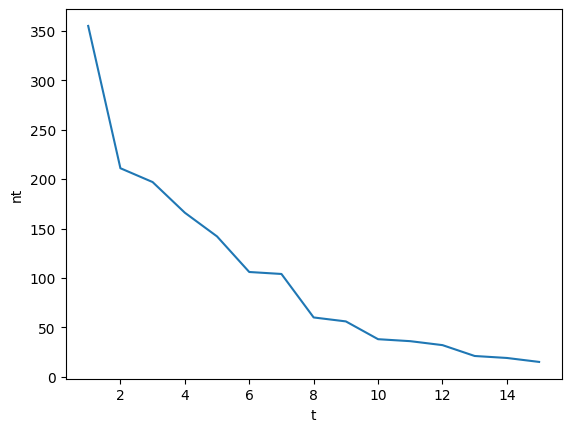

In [ ]:
# 데이터 추세 파악
plt.plot(data['t'], data['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

In [ ]:
model = LinearRegression()
model.fit(data[['t']], data['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(data[['t']])
standardized_residuals = (data['nt'] - fitted_values) / data['nt'].std()

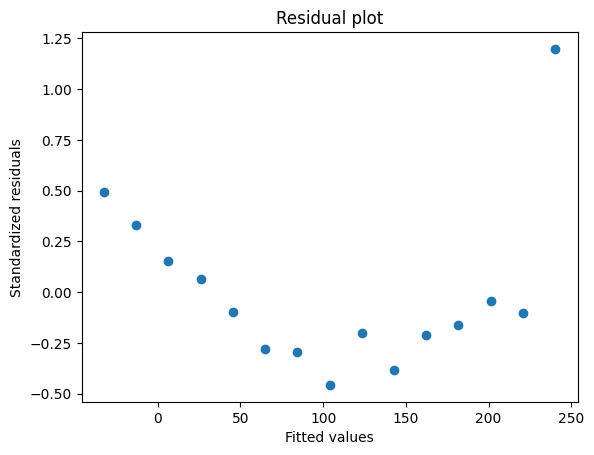

In [ ]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

bacteria 데이터에 단순 회귀 모형을 적용하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

In [ ]:
# ans : 회귀 모형의 잔차 양상이 등분산성을 위배하는 경우 데이터를 변환하거나 가중 최소제곱법을 사용하여 이를 해결할 수 있다.

#### Q1.0 EDA

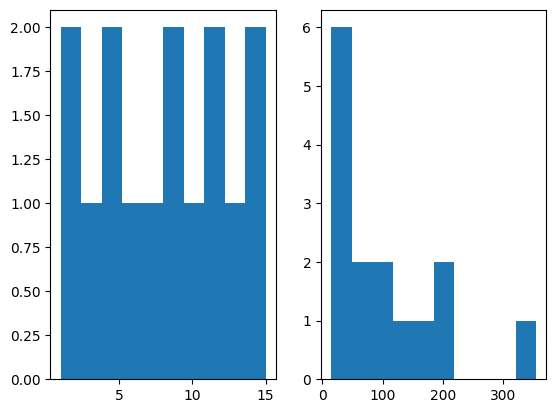

In [ ]:
bacteria= pd.read_csv("/content/bacteria.csv")

plt.subplot(1,2,1)
plt.hist(bacteria['t'])
plt.subplot(1,2,2)
plt.hist(bacteria['nt'])
plt.show()

't' 변수의 경우 분포가 대체적으로 안정적이지만, 'nt'의 경우 분포의 왜도(Skewness)가 크다. 또한 residual plot에서 알 수 있듯이 'nt' 값에 따라 잔차가 달라지는 양상이 포착되므로 종속변수인 'nt'만을 대상으로 변환을 시행함이 타당해보인다.

#### Q1.1 데이터 변환 기법(log 변환)

먼저 원본 데이터가 대략적으로 로그 함수 모양을 취하고 있으므로 log 변환이 적합함을 알 수 있다.

In [ ]:
bacteria_log= pd.read_csv("/content/bacteria.csv")

# 종속변수 log 변환
bacteria_log['nt']=np.log(bacteria_log['nt'])
bacteria_log.head()

,t,nt
0,1,5.872118
1,2,5.351858
2,3,5.283204
3,4,5.111988
4,5,4.955827


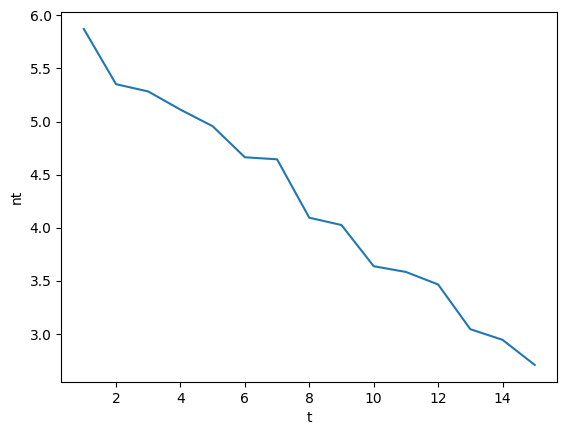

In [ ]:
plt.plot(bacteria_log['t'], bacteria_log['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

변환 후 데이터가 일차함수의 모양을 가지게 됐음을 알 수 있다.

In [ ]:
model = LinearRegression()
model.fit(bacteria_log[['t']], bacteria_log['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(bacteria_log[['t']])
standardized_residuals = (bacteria_log['nt'] - fitted_values) / bacteria_log['nt'].std()

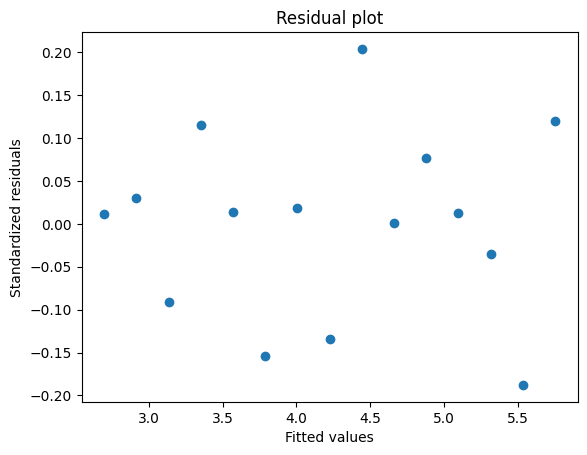

In [ ]:
# residual plot
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

등분산성 문제가 완화된 결과를 확인할 수 있다.

#### Q1.2 box-cox method

box-cox method는 정규분포를 가정한 최대우도법을 이용하여 추정한 lamda 값을 이용하여 적절한 데이터 변환을 수행하는 기법을 의미한다.

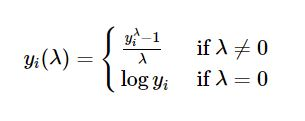

데이터로부터 도출된 lamda 값을 위 등식에 적용하여 적절한 데이터 변환을 진행할 수 있다.

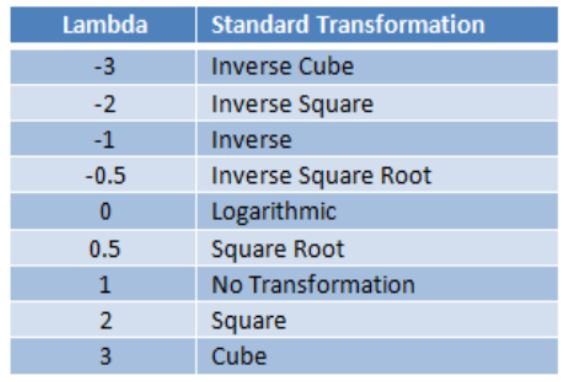


lamda 값에 따른 구체적인 변환 양상은 위 표와 같다.

추가로, lamda값은 최대우도법을 이용하여 구할 수 있으며, 주로 정규분포를 가정하여 lamda를 추정한다.

In [ ]:
import scipy.stats as stats

In [ ]:
bacteria_cox= pd.read_csv("/content/bacteria.csv")

# box-cox 변환 실행
bacteria_cox['nt'], lambda_optimal = stats.boxcox(bacteria_cox['nt'])
print("최적의 lambda 값:", lambda_optimal)

최적의 lambda 값: -0.007771097146368952


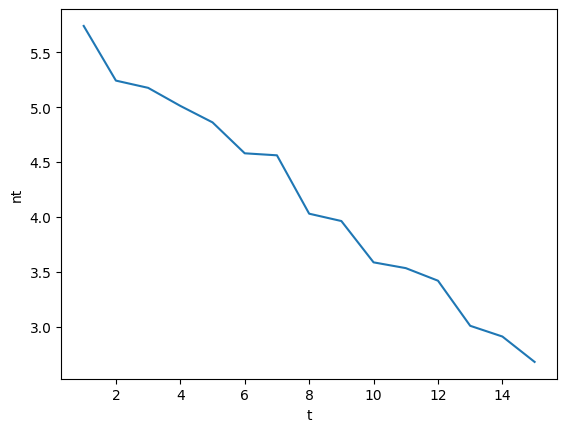

In [ ]:
plt.plot(bacteria_cox['t'], bacteria_cox['nt'])
plt.xlabel('t')
plt.ylabel('nt')
plt.show()

log 변환과 비슷하게 box-cox 변환 후 데이터가 일차 함수의 모양을 가지게 됐음을 확인할 수 있다.

In [ ]:
model = LinearRegression()
model.fit(bacteria_cox[['t']], bacteria_cox['nt'])

# 예측값과 표준화 잔차 계산
fitted_values = model.predict(bacteria_cox[['t']])
standardized_residuals = (bacteria_cox['nt'] - fitted_values) / bacteria_cox['nt'].std()

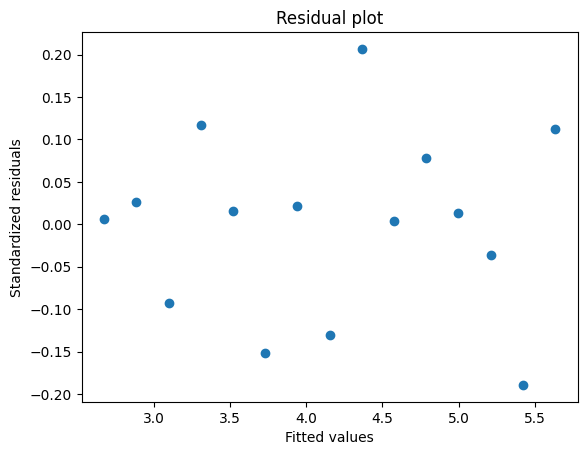

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

등분산성 문제가 완화된 결과를 확인할 수 있다.

#### Q1.3 가중 최소제곱법

In [ ]:
bac_we=pd.read_csv("/content/bacteria.csv")

weights = 1 /bac_we['nt']

원본 데이터가 로그 함수 모양을 가지므로 종속 변수의 역수로 가중치를 설정하였다.

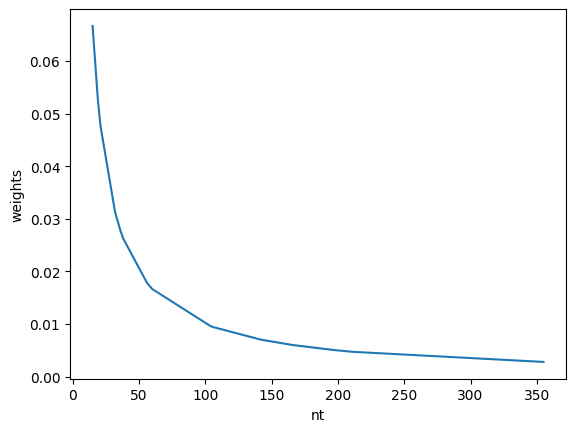

In [ ]:
plt.plot(bac_we['nt'], weights)
plt.xlabel('nt')
plt.ylabel('weights')
plt.show()

In [ ]:
# 가중 최소제곱법을 이용한 모델 적합(WLS)

model_we = LinearRegression()
model_we.fit(bac_we[['t']], bac_we['nt'], sample_weight=weights)
fitted_values = model_we.predict(bac_we[['t']])
standardized_residuals = (bac_we['nt'] - fitted_values) / bac_we['nt'].std()

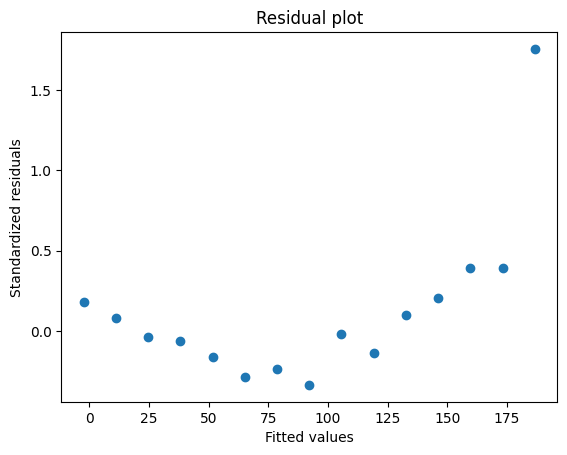

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Residual plot')
plt.show()

원본보다 분산이 안정화되었지만 여전히 등분산성이 위배된 결과가 관측된다.

bacteria 데이터의 경우 변환 기법이 등분산성 위배 문제를 해결하기 위해 더욱 효과적인 수단으로 보인다.

### Q2

In [ ]:
# 데이터 로드
data2 = pd.read_csv("/content/artificial1.csv")

In [ ]:
data2.head()

,X,Y
0,11.0142,24.8831
1,2.7066,14.7374
2,11.5839,64.0250
3,8.9989,16.1965
4,2.1201,7.3907


In [ ]:
# 선형 회귀 모형 적합
result1 = smf.ols('Y ~ X', data=data2).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result1.predict()
standardized_residuals = result1.get_influence().resid_studentized_internal

In [ ]:
# 요약 정보 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     34.69
Date:                Sun, 28 Jul 2024   Prob (F-statistic):           5.44e-08
Time:                        13:00:32   Log-Likelihood:                -352.93
No. Observations:                 100   AIC:                             709.9
Df Residuals:                      98   BIC:                             715.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0482      2.324      2.602      0.0

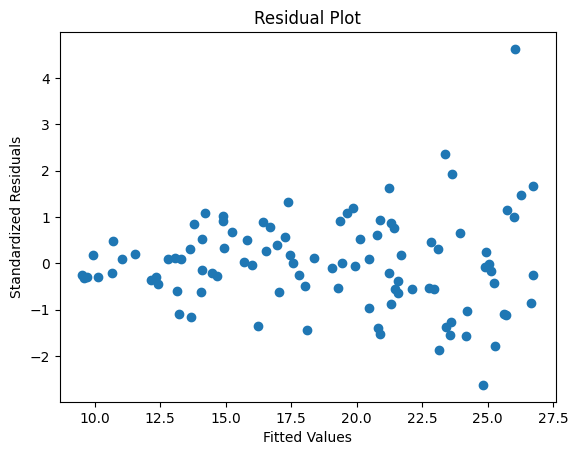

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

artificial1데이터에 단순 회귀 모형을 피팅하였더니 등분산성을 위배하는 잔차 양상이 관찰되었습니다.
이를 개선하기 위해 데이터 변환 기법, 가중 최소제곱법 등 적절한 통계적 기법을 동원하여 등분산성이 관측되도록 해주세요. (아래에 코드 작성해주세요)

In [ ]:
# ans : 1번 문제와 동일하게 데이터 변환과 가중 최소제곱법을 사용하여 등분산성이 관측되도록 할 수 있다.

#### Q2.0 EDA

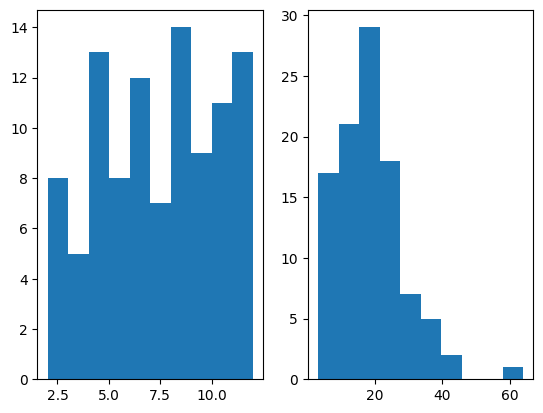

In [ ]:
art= pd.read_csv("/content/artificial1.csv")

plt.subplot(1,2,1)
plt.hist(art['X'])
plt.subplot(1,2,2)
plt.hist(art['Y'])
plt.show()

Q1과 동일하게 종속변수인 'Y'의 왜도가 크므로 종속 변수에만 변환 기법을 적용함이 타당해보인다.

#### Q2.1 데이터 변환기법(log 변환)

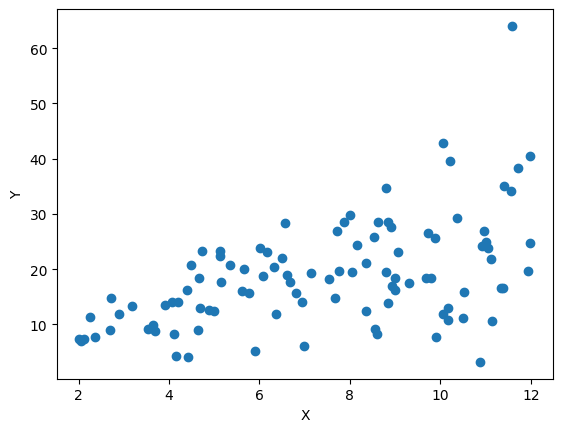

In [ ]:
art_log = pd.read_csv("/content/artificial1.csv")

plt.scatter(art_log['X'], art_log['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

관측 결과 데이터가 대략 지수 함수 꼴의 모양을 하고 있으므로 log 변환이 적합하다는 판단을 내릴 수 있다.

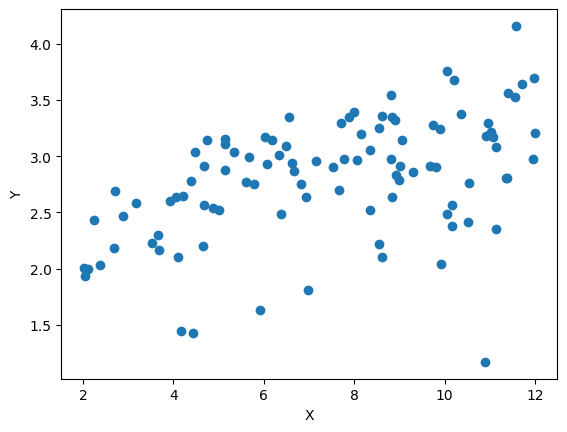

In [ ]:
# log 변환
art_log["Y"]=np.log(art_log['Y'])

# 변환 후 시각화
plt.scatter(art_log['X'], art_log['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

변환 결과 데이터가 대략적으로 일차함수의 모양을 가지게 되었다. 이상치가 존재하지만 과제 취지 상 제거하지 않았다.

In [ ]:
result_log = smf.ols('Y ~ X', data=art_log).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result_log.predict()
standardized_residuals = result_log.get_influence().resid_studentized_internal

In [ ]:
print(result_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     29.53
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           4.02e-07
Time:                        16:37:31   Log-Likelihood:                -66.210
No. Observations:                 100   AIC:                             136.4
Df Residuals:                      98   BIC:                             141.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1335      0.132     16.143      0.0

변환 후 t값이 커지고 p-value가 작아진 결과를 확인할 수 있다.

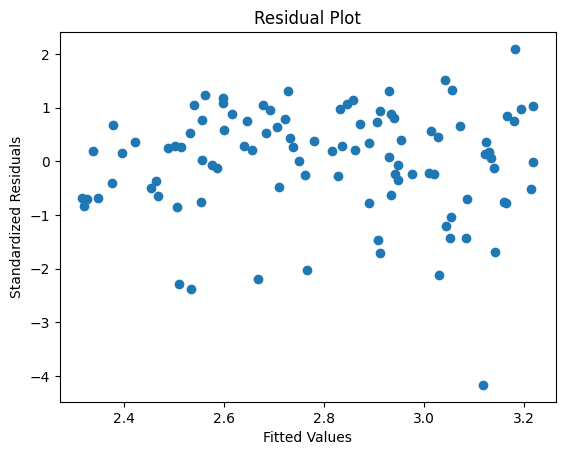

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

잔차 plot을 통해 확인한 결과 등분산성 문제가 완화된 것을 확인할 수 있다.

#### Q2.2 box_cox method

In [ ]:
art_cox = pd.read_csv("/content/artificial1.csv")

# box-cox 변환 수행
art_cox['Y'], lambda_optimal = stats.boxcox(art_cox['Y'])
print("최적의 lambda 값:", lambda_optimal)

최적의 lambda 값: 0.30946037963372514


In [ ]:
result_cox = smf.ols('Y ~ X', data=art_cox).fit()

# 잔차 표준화 및 산점도 그리기
fitted_values = result_cox.predict()
standardized_residuals = result_cox.get_influence().resid_studentized_internal

In [ ]:
print(result_cox.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     33.13
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           9.87e-08
Time:                        16:39:30   Log-Likelihood:                -149.39
No. Observations:                 100   AIC:                             302.8
Df Residuals:                      98   BIC:                             308.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9357      0.304      9.668      0.0

box-cox 변환 역시 t값이 커지고 유의확률이 감소하였다.

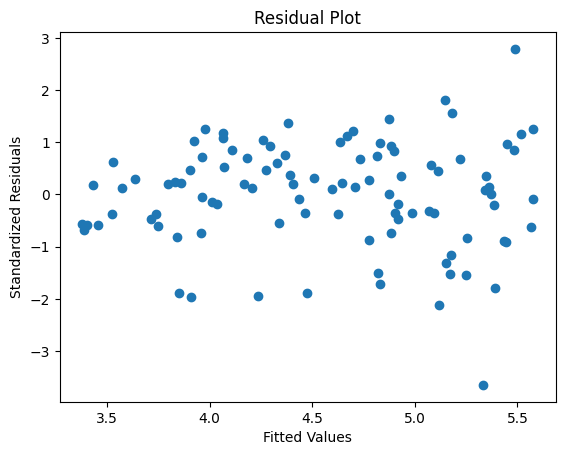

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

Residual plot을 통해 확인한 결과 어느정도 등분산성을 유지하게 된 결과를 확인할 수 있다.

#### Q2.3 가중 최소제곱법

In [ ]:
art_we = pd.read_csv("/content/artificial1.csv")

# Q1.3과 동일하게 종속변수의 역수를 가중치로 사용하였다.
weights = 1 /art_we['Y']

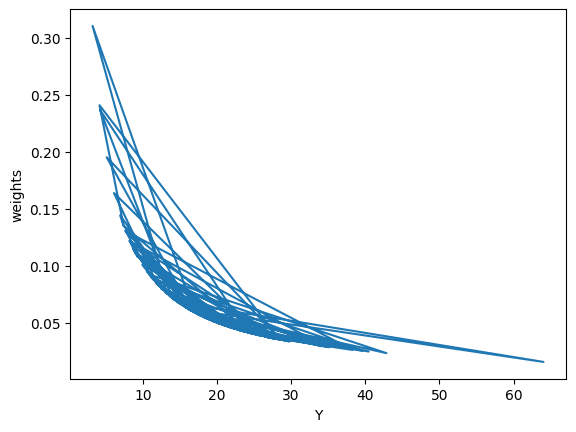

In [ ]:
plt.plot(art_we['Y'], weights)
plt.xlabel('Y')
plt.ylabel('weights')
plt.show()

In [ ]:
# 가중 최소제곱법을 이용한 모델 적합(WLS)

result_we= smf.wls('Y ~ X', data=art_we, weights=weights).fit()

fitted_values = result_we.predict()
standardized_residuals = (art_we['Y'] - fitted_values) / art_we['Y'].std()

In [ ]:
print(result_we.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.149
Model:                            WLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           7.51e-05
Time:                        17:04:51   Log-Likelihood:                -351.75
No. Observations:                 100   AIC:                             707.5
Df Residuals:                      98   BIC:                             712.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9464      1.890      3.676      0.0

t값이 상승하고 유의확률이 줄어든 결과를 확인할 수 있다.

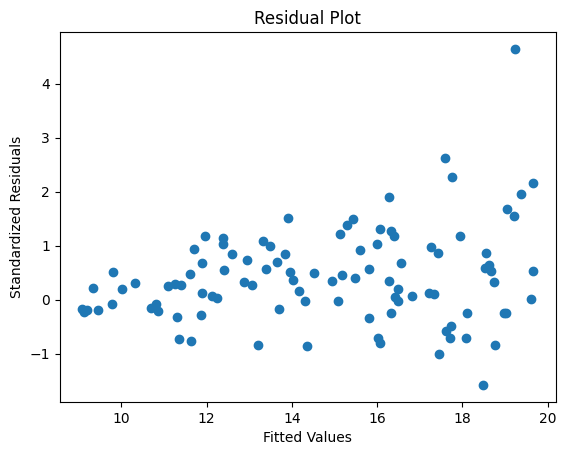

In [ ]:
plt.scatter(fitted_values, standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residual Plot')
plt.show()

하지만 여전히 등분산성이 위배되는 양상을 보인다. Q2에서 역시 데이터 변환 기법이 더욱 효과적인 방안으로 보인다.

### Q3. 단순회귀모델에서 등분산성이 위배되는 것이 문제가 되는 이유가 무엇인지에 대해서 강의 내용을 바탕으로 서술하여주세요.

ans : 독립변수 'X'값에 대해 종속 변수 'Y'의 분산이 일정하지 않다면, 즉 등분산성이 위배되는 문제가 발생한다면, 회귀 모델이 X값에 대해 일관된 예측 정확도를 유지하지 못한다. 이는 독립변수에 따라 예측의 정확도가 달라진다는 것을 의미하므로 모델 자체의 정확도와 유용도가 현저히 떨어지게 된다. 또한, 등분산성이 위배되는 경우 잔차에 정보가 남아있음을 의미하므로 모델의 정확도를 높이기 위해서는 해당 정보를 포함한 분석 기법을 고안해야만 한다. 마지막으로 단순회귀 모델에서는 오차가 동일한 분산을 따르는 것을 가정한 채로 수행된다. 하지만 분석 결과 잔차가 동일한 분산을 가지고 있지 않음이 확인된다면, 단순회귀모델의 주요 가정을 위배하게 되므로 역시 모델의 정확도가 떨어지는 결과를 초래한다. 정리하자면 등분산성이 위배되는 경우, 독립 변수에 따라 예측의 정확도가 달라지고, 분석되지 않은 정보가 남아있게 되며, 모델의 주요 가정을 위배되는 결과를 초래하게 된다.